#**0. Preparacion de entorno**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/TFM/Data

/content/drive/MyDrive/Colab_Notebooks/TFM/Data


In [3]:
import pandas as pd
df = pd.read_excel("TFM_Database.xlsx")

In [4]:
df.head()

,ref_año,pais_origen,adquiere_nacionalidad,busqueda_asilo,migrantes_convencionales,salida_de_migrantes,migrantes_en_el_pais,pais_destino,año,crecimiento_GDP,...,inflación,inflación_2,indice_gini,indice_gini_2,hdi,hdi_2,desempleo,desempleo_2,expectativa_de_vida,expectativa_de_vida_2
0,DEU2015SYR2015,Syrian Arab Republic,2027.0,158655.0,309699.0,11216.0,118196.0,Germany,2015,2.169499,...,0.906794,10.927114,30.8,NaN,0.942,0.544,4.981,8.581,81.090244,65.492
1,DEU2016SYR2016,Syrian Arab Republic,2263.0,266250.0,179435.0,33612.0,366556.0,Germany,2016,1.652720,...,0.514426,38.461143,31.7,NaN,0.941,0.552,4.624,8.531,80.641463,63.265
2,COL2019VEN2019,Venezuela,NaN,10479.0,206560.0,NaN,NaN,Colombia,2019,2.564324,...,3.240569,NaN,50.4,NaN,0.766,0.738,9.111,7.217,76.579000,72.641
3,COL2018VEN2018,Venezuela,NaN,2592.0,201667.0,NaN,NaN,Colombia,2018,1.359361,...,4.314313,NaN,49.7,NaN,0.765,0.750,8.872,7.302,76.418000,71.903
4,USA2016MEX2016,Mexico,103487.0,27879.0,173543.0,NaN,8256829.0,United States,2016,2.945550,...,0.118627,2.720641,41.2,NaN,0.924,0.769,5.280,4.313,78.690244,74.431


# **1. Creacion de Subset macro-economico**

Sabemos que las columnas 10 en adelante son the datasets externos y todos son indicadores macro economicos, por lo que usmaos el metodo iloc[] para crear el subset

Tambien necesitamos los datos identificativos como año y los paises destino y origen. Usamos el metdo de concat para poder tener este subset

In [5]:
df_indicators = pd.concat([df[['ref_año','pais_origen', 'pais_destino','año']], df.iloc[:, 9:]], axis=1)

In [6]:
df_indicators.head()

,ref_año,pais_origen,pais_destino,año,crecimiento_GDP,crecimiento_GDP_2,inflación,inflación_2,indice_gini,indice_gini_2,hdi,hdi_2,desempleo,desempleo_2,expectativa_de_vida,expectativa_de_vida_2
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,2.169499,-10.310340,0.906794,10.927114,30.8,NaN,0.942,0.544,4.981,8.581,81.090244,65.492
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,1.652720,-4.179792,0.514426,38.461143,31.7,NaN,0.941,0.552,4.624,8.531,80.641463,63.265
2,COL2019VEN2019,Venezuela,Colombia,2019,2.564324,NaN,3.240569,NaN,50.4,NaN,0.766,0.738,9.111,7.217,76.579000,72.641
3,COL2018VEN2018,Venezuela,Colombia,2018,1.359361,NaN,4.314313,NaN,49.7,NaN,0.765,0.750,8.872,7.302,76.418000,71.903
4,USA2016MEX2016,Mexico,United States,2016,2.945550,2.702323,0.118627,2.720641,41.2,NaN,0.924,0.769,5.280,4.313,78.690244,74.431


# **2. Analisis exploratorio y tratamiento de datos**

## **2.1. Tratamiento de datos nulos**

### **2.1.1. Conteo general de nulos**

Para este paso, primero haremos un vistazo general de las columnas y sus valores nulos, pero posteriormente agruparemos los datos por pais y ver las columnas con valores nulos para ver si hay paises que no tienen suficientes datos

In [7]:
#Vemos si hay valores nulos
print(f"total null values per column \n", df_indicators.isnull().sum())

total null values per column 
 ref_año                      0
pais_origen                  0
pais_destino                 0
año                          0
crecimiento_GDP              0
crecimiento_GDP_2         5126
inflación                    0
inflación_2               9634
indice_gini               9649
indice_gini_2            47368
hdi                          0
hdi_2                     6376
desempleo                    0
desempleo_2               9833
expectativa_de_vida          0
expectativa_de_vida_2     3542
dtype: int64


In [8]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77562 entries, 0 to 77561
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ref_año                77562 non-null  object 
 1   pais_origen            77562 non-null  object 
 2   pais_destino           77562 non-null  object 
 3   año                    77562 non-null  int64  
 4   crecimiento_GDP        77562 non-null  float64
 5   crecimiento_GDP_2      72436 non-null  float64
 6   inflación              77562 non-null  float64
 7   inflación_2            67928 non-null  float64
 8   indice_gini            67913 non-null  float64
 9   indice_gini_2          30194 non-null  float64
 10  hdi                    77562 non-null  float64
 11  hdi_2                  71186 non-null  float64
 12  desempleo              77562 non-null  float64
 13  desempleo_2            67729 non-null  float64
 14  expectativa_de_vida    77562 non-null  float64
 15  ex

### **2.1.2 Eliminacion de paises sin data macroeconomica**

El primer paso que consideramos correcto para limpiar la base de datos de manera eficiente, es eliminar los paises que no tengan data disponible, ya que no tienen mucha utilidad para nuestro modelo

En este caso podemos ver que los problemas vienen principalmente de los paises de origen (indicadores con el numero '2')

In [9]:
#creamos una lista de los paises sin datos, para posteriormente eliminarlos del df

no_data_countries = [] #lista vacia donde estaran dichos paises

#agrupamos la data por paises y tomamos GDP, un indicador anual.
grouped_countries = df_indicators.groupby('pais_origen')['crecimiento_GDP_2'] # consideramos que si todos son nulos, el resto de indicadores tambien

# creamos un loop que compare el total de valores nulos de 'GDP' con el total de filas
for country, series in grouped_countries:
    # Si el numero coincide entra a la lista y concluimos que no hay data asociada a dicho pais
    if series.isna().sum() == len(series):
        no_data_countries.append(country)

In [10]:
#Mostramos en pantalla la lista de paises sin data para poder analizarlos
print(f'paises sin data disponible: \n')

for c in no_data_countries:
  print(c)

paises sin data disponible: 

Anguilla
British Virgin Islands
Caribbean
Chinese Taipei
Cook Islands
Democratic Peopleâ€™s Republic of Korea
EEA
European Union (15 countries)
Falkland Islands (Malvinas)
Former Czechoslovakia
Former Netherlands Antilles
Former Serbia and Montenegro
Former USSR
Former Yugoslavia
French Guiana
Gibraltar
Guadeloupe
Holy See
Kosovo
Martinique
Mayotte
Montserrat
New Caledonia
Niue
Norfolk Island
Pitcairn
RÃ©union
Saint Helena
Saint Pierre and Miquelon
Svalbard and Jan Mayen
Tokelau
Wallis and Futuna


Estos son los paises que tenemos que eliminar de la lista ya que no tienen data macroeconomica asociada a ellos en las bases de datos de la OECD, ONU ni World Bank. Esto puede ser por diferentes razones:


*   Pais no reconocido internacionalmente (no tiene codigo pais que coincida con las bases de datos)
*   No es un pais: Se puede ver en los caasos como World, European Union, Caribbean, etc...
* Paises con poca trasnparencia o acceso de datos (i.e.: Korea del norte)

En muchos de estos casos, no hay poblaciones muy grandes y por ende, son paises con poco flujos migratorios, por lo que no creemos que afecten gravemente el modelo



In [11]:
df_indicators = df_indicators[~df_indicators['pais_origen'].isin(no_data_countries)]

In [12]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73511 entries, 0 to 77561
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ref_año                73511 non-null  object 
 1   pais_origen            73511 non-null  object 
 2   pais_destino           73511 non-null  object 
 3   año                    73511 non-null  int64  
 4   crecimiento_GDP        73511 non-null  float64
 5   crecimiento_GDP_2      72436 non-null  float64
 6   inflación              73511 non-null  float64
 7   inflación_2            67796 non-null  float64
 8   indice_gini            64350 non-null  float64
 9   indice_gini_2          30194 non-null  float64
 10  hdi                    73511 non-null  float64
 11  hdi_2                  71186 non-null  float64
 12  desempleo              73511 non-null  float64
 13  desempleo_2            67236 non-null  float64
 14  expectativa_de_vida    73511 non-null  float64
 15  expecta

### **2.1.3. Analisis detallado de los nulos**

Ya que no hay paises sin datos, procedemos a hacer un analisis mas detallado de los valores nulos, el cual variara por columna.

Algunos datos macroeconomicos como inflacion o crecimiento de GDP se calculan de manera anual, mientras que indicadores como el Indice GINI tienen periocidad inconsistente y puede ser complicado de medir en algunos paises

In [13]:
indicators_2 = ['crecimiento_GDP_2', 'inflación_2']


In [14]:
df_indicators.groupby('pais_origen')[indicators_2] \
    .apply(lambda x: x.isna().sum()) \
    .loc[lambda df: df.sum(axis=1) > 0] \
    .sort_values(by=indicators_2, ascending=False).head(30)

,crecimiento_GDP_2,inflación_2
pais_origen,,
Liechtenstein,320,351
Eritrea,272,379
Djibouti,175,0
Venezuela,161,81
South Sudan,115,0
Turks and Caicos Islands,32,133
Cuba,0,386
Argentina,0,382
Somalia,0,379


### **2.1.4. Datos nulos por crecimeinto de GDP**

Buscamos los datos faltantes para analizar cuales años les falta datos para analizar la posibilidad de buscar otra base de datos para poder completarlos



In [15]:
df_indicators.groupby(['pais_origen', 'año'])['crecimiento_GDP_2'].apply(lambda x: x.isna().sum()).loc[lambda x: x > 0]

pais_origen               año 
Djibouti                  2010    32
                          2011    33
                          2012    36
                          2013    36
                          2014    38
Eritrea                   2013    36
                          2014    39
                          2015    39
                          2016    39
                          2017    39
                          2018    39
                          2019    41
Liechtenstein             2011    31
                          2012    36
                          2013    36
                          2014    37
                          2015    35
                          2016    36
                          2017    35
                          2018    36
                          2019    38
South Sudan               2017    38
                          2018    38
                          2019    39
Turks and Caicos Islands  2012    32
Venezuela                 2016    40
                          2017    40
                          2018    40
                          2019    41
Name: crecimiento_GDP_2, dtype: int64

In [16]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gdp_nulls = df_indicators['crecimiento_GDP_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para gdp de pais origen: {gdp_nulls}
Porcentaje de nulos sobre el total de registros: {round(gdp_nulls/len(df_indicators),3)*100} %
""")


Cantidad de valores nulo para gdp de pais origen: 1075
Porcentaje de nulos sobre el total de registros: 1.5 %



### **2.1.5. Datos nulos por inflacion**

Viendo la cantidad de valores nulos de inflacion vs los de cecimeinto de PIB, tenemos la hipotesis de que para varios paises no se encontraron datos de inflacion. Para comprobar esto Haremos un loop que nos ayude a identificar si esto ocurre

In [17]:
countries_all_nulls = []

# Group by country
grouped = df_indicators.groupby('pais_origen')

for country, group in grouped:
    total_rows = len(group)
    nulls = group['inflación_2'].isna().sum()

    if nulls == total_rows and total_rows > 0:
        countries_all_nulls.append(country)

print(f"paises sin data de inflacion:\n")
for c in countries_all_nulls:
  print(c)


paises sin data de inflacion:

American Samoa
Andorra
Argentina
Bermuda
Cuba
Eritrea
Faroe Islands
French Polynesia
Greenland
Guam
Liechtenstein
Marshall Islands
Monaco
Northern Mariana Islands
Puerto Rico
Somalia
Turkmenistan
Turks and Caicos Islands
United States Virgin Islands


In [18]:
# Calculamos la cantitdad de valores nulos por Indice inflacion de pais orign
inf_nulls = df_indicators['inflación_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para inflacion de pais origen: {inf_nulls}
Porcentaje de nulos sobre el total de registros: {round(inf_nulls/len(df_indicators),2)*100} %
""")


Cantidad de valores nulo para inflacion de pais origen: 5715
Porcentaje de nulos sobre el total de registros: 8.0 %



Dado que hay mucha data faltante de ambos indicadores (para paises origen), y de paises clave como Argentina, se decidio buscar data complementaria de el Fondo Monetario Internacional (IMF) para completar los nulos.

Esta manera nos aseguramos que toda la data disponible esta reflejada. Hay paises que posiblemente no tengan data macroeconomica por diferentes razones.

### **2.1.6. Tramiento de nulos de GDP e inflacion de paises de origen**

In [19]:
%cd /content/drive/MyDrive/TFM/Data/supplemental_data

/content/drive/MyDrive/Colab_Notebooks/TFM/Data/supplemental_data


In [20]:
import pandas as pd
df_external = pd.read_excel("IMF__supplemental_data_2.xls") # Dataset propietario que contiene data de inflacion, crecimiento de GDP y desemploe (data de IMF)

In [21]:
#vemos las primeras 5 filas
df_external.head()

,Indicator code,Contry code,pais_origen,año,inflación_2,crecimiento_GDP_2,desempleo_2
0,AFG1980,AFG,Afghanistan,1980,no data,no data,NaN
1,AFG1981,AFG,Afghanistan,1981,no data,no data,NaN
2,AFG1982,AFG,Afghanistan,1982,no data,no data,NaN
3,AFG1983,AFG,Afghanistan,1983,no data,no data,NaN
4,AFG1984,AFG,Afghanistan,1984,no data,no data,NaN


Podemos ver que para algunos indicadores los nulos aparecen como "do data" el cual es un string en vez de un NaN

In [22]:
import numpy as np

# Remplazamos todas las instancias de 'no data' por NaN
df_external.replace('no data', np.nan, inplace=True)

/tmp/ipython-input-22-4249432755.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_external.replace('no data', np.nan, inplace=True)


In [23]:
#Hacemos una copia donde le agregamos 1 año a los indicadores de esta data set externo
#Esto es para ser consistentes con el df original y usar inflacion del año anterior como indicador (lagging indicator)
df_external_2 = df_external.copy()
df_external_2['año'] = df_external_2['año'] + 1

In [24]:
# Actualizamos el id de pais + año para que coincida con el df otiginal
df_external_2['Indicator code'] = df_external_2['Contry code'].astype(str) + df_external_2['año'].astype(str)

In [25]:
df_external_2.head()

,Indicator code,Contry code,pais_origen,año,inflación_2,crecimiento_GDP_2,desempleo_2
0,AFG1981,AFG,Afghanistan,1981,NaN,NaN,NaN
1,AFG1982,AFG,Afghanistan,1982,NaN,NaN,NaN
2,AFG1983,AFG,Afghanistan,1983,NaN,NaN,NaN
3,AFG1984,AFG,Afghanistan,1984,NaN,NaN,NaN
4,AFG1985,AFG,Afghanistan,1985,NaN,NaN,NaN


In [26]:
#creamos un id para los paises origen en el df original para poder hacer el join con la base de datos complementaria
df_indicators['Indicator code'] = df_indicators['ref_año'].astype(str).str[-7:] #los ultimos 7 caracteres corresponden al pais origen y año, el mismo formato del df complementario

/tmp/ipython-input-26-665766503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicators['Indicator code'] = df_indicators['ref_año'].astype(str).str[-7:] #los ultimos 7 caracteres corresponden al pais origen y año, el mismo formato del df complementario


In [27]:
# Creamos un nuevo data set haciendo un merge del df original y el da la data complementaria del IMF
df_merged = df_indicators.merge(
    df_external_2,
    on='Indicator code',
    how='left',
    suffixes=('', '_ext')
)

In [28]:
#identificamos las columnas que queremos rellenar
cols_to_fill = ['inflación_2', 'crecimiento_GDP_2', 'desempleo_2']

#Hacemos un loop para rellenar los NaNs de ambas columnas con la data complementaria
for col in cols_to_fill:
    df_merged[col] = df_merged[col].fillna(df_merged[f"{col}_ext"])

In [29]:
df_merged.head(10)

,ref_año,pais_origen,pais_destino,año,crecimiento_GDP,crecimiento_GDP_2,inflación,inflación_2,indice_gini,indice_gini_2,...,desempleo_2,expectativa_de_vida,expectativa_de_vida_2,Indicator code,Contry code,pais_origen_ext,año_ext,inflación_2_ext,crecimiento_GDP_2_ext,desempleo_2_ext
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,2.169499,-10.310340,0.906794,10.927114,30.8,NaN,...,8.581,81.090244,65.492,SYR2015,SYR,Syria,2015.0,NaN,NaN,NaN
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,1.652720,-4.179792,0.514426,38.461143,31.7,NaN,...,8.531,80.641463,63.265,SYR2016,SYR,Syria,2016.0,NaN,NaN,NaN
2,COL2019VEN2019,Venezuela,Colombia,2019,2.564324,-19.700000,3.240569,130060.200000,50.4,NaN,...,7.217,76.579000,72.641,VEN2019,VEN,Venezuela,2019.0,130060.2,-19.7,35.6
3,COL2018VEN2018,Venezuela,Colombia,2018,1.359361,-15.700000,4.314313,862.600000,49.7,NaN,...,7.302,76.418000,71.903,VEN2018,VEN,Venezuela,2018.0,862.6,-15.7,27.9
4,USA2016MEX2016,Mexico,United States,2016,2.945550,2.702323,0.118627,2.720641,41.2,NaN,...,4.313,78.690244,74.431,MEX2016,MEX,Mexico,2016.0,2.1,2.7,4.3
5,USA2017MEX2017,Mexico,United States,2017,1.819451,1.772493,1.261583,2.821708,41.1,46.9,...,3.859,78.539024,74.376,MEX2017,MEX,Mexico,2017.0,3.4,1.8,3.9
6,DEU2016AFG2016,Afghanistan,Germany,2016,1.652720,1.451315,0.514426,-0.661709,31.7,NaN,...,11.387,80.641463,62.270,AFG2016,AFG,Afghanistan,2016.0,1.1,1.0,NaN
7,USA2018MEX2018,Mexico,United States,2018,2.457622,1.871729,2.130110,6.041457,41.2,NaN,...,3.420,78.539024,74.261,MEX2018,MEX,Mexico,2018.0,6.8,1.9,3.4
8,USA2019MEX2019,Mexico,United States,2019,2.966505,1.972082,2.442583,4.899350,41.4,46.0,...,3.283,78.639024,74.301,MEX2019,MEX,Mexico,2019.0,4.8,2.0,3.3
9,USA2015MEX2015,Mexico,United States,2015,2.523820,2.503764,1.622223,4.018616,41.5,48.9,...,4.809,78.841463,74.404,MEX2015,MEX,Mexico,2015.0,4.1,2.5,4.8


In [30]:
# Finalmente eliminamos las columnas adicionales una vez la data ha sido usada para rellenar los valores nulos disponibles
df_merged = df_merged.drop(columns=['inflación_2_ext', 'crecimiento_GDP_2_ext', 'desempleo_2_ext', 'Indicator code',	'Contry code',	'pais_origen_ext',	'año_ext'])

In [31]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
inf_nulls = df_merged['inflación_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para inflacion de pais origen: {inf_nulls}
Porcentaje de nulos sobre el total de registros: {round(inf_nulls/len(df_merged),2)*100} %
""")


Cantidad de valores nulo para inflacion de pais origen: 2103
Porcentaje de nulos sobre el total de registros: 3.0 %



In [32]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gdp_nulls = df_merged['crecimiento_GDP_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para GDP de pais origen: {gdp_nulls}
Porcentaje de nulos sobre el total de registros: {round(gdp_nulls/len(df_merged),2)*100} %
""")


Cantidad de valores nulo para GDP de pais origen: 467
Porcentaje de nulos sobre el total de registros: 1.0 %



El resultaod final fue muy satisfactorio logrando disminuir la cantidad de nulos en 50 puntos basicos para la columna de GDP y 5 puntos porcentuales en la de inflacion, de pais origen

### **2.1.7 Valores nulos para HDI y GINI**

Estos indices son particulares.Son considerablemente mas dificiles de medir y etsan compuesto por diferentes metricas individuales. Debido al la complicacion, falta de estandarizacion y que no tiene temporalidad consistente, en muchos años no habra una actualizacion.

Considerando esto, nos parecio que tiene sentido hacer forward-fill de los nulos. Esta tecnica mantendra el mismo valor de GINI y HDI hasta el proximo año en el que se actualiza, y ese pasa a ser el nuevo valor  

In [33]:
# Para visualizar mas facilmente estos datos separaremos los indicadores para ver los que corresponden a pasies destino y paises de origen

indicators_3 = ['indice_gini', 'hdi'] # Columnas de pais destino
indicators_4 = ['indice_gini_2', 'hdi_2'] # Columnas de pais de origen

In [34]:
df_merged.groupby('pais_destino')[indicators_3] \
    .apply(lambda x: x.isna().sum()) \
    .loc[lambda df: df.sum(axis=1) > 0] \
    .sort_values(by=indicators_3, ascending=False).head(30)

,indice_gini,hdi
pais_destino,,
New Zealand,1906,0
Japan,1597,0
TÃ¼rkiye,1513,0
Australia,1192,0
Chile,986,0
Mexico,968,0
Korea,800,0
Iceland,199,0


Por lo que podemos ver HDI no necesitara de tratamiento adicional, mientras que le indice GINI si requiere de mas analisis

### AGREGO EL CODIGO PARA LA DETECCION DE VALORES NULOS Y 0 QUE PODEMOS DEJAR PUESTO EN EL INFORME, DE CAMBIARLO POR FAVOR AVISAR

In [35]:
# Proporción de valores nulos por columna
null_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Proporción de valores null:")
print(null_percent)

print("\n" + "="*50 + "\n")

# Proporción de ceros por columna (solo para columnas numéricas)
numeric_cols = df.select_dtypes(include='number').columns
zero_percent = (df[numeric_cols] == 0).mean().sort_values(ascending=False) * 100

print("Proporción de valores iguales a 0:")
print(zero_percent)


Proporción de valores null:
indice_gini_2               61.071143
salida_de_migrantes         46.917305
migrantes_en_el_pais        31.258864
migrantes_convencionales    24.648668
adquiere_nacionalidad       23.071865
busqueda_asilo              19.357417
desempleo_2                 12.677600
indice_gini                 12.440370
inflación_2                 12.421031
hdi_2                        8.220520
crecimiento_GDP_2            6.608906
expectativa_de_vida_2        4.566669
ref_año                      0.000000
pais_origen                  0.000000
crecimiento_GDP              0.000000
pais_destino                 0.000000
año                          0.000000
inflación                    0.000000
hdi                          0.000000
desempleo                    0.000000
expectativa_de_vida          0.000000
dtype: float64


Proporción de valores iguales a 0:
busqueda_asilo              48.964699
adquiere_nacionalidad       28.697042
migrantes_convencionales    15.939506
migrante

In [36]:
df_merged.groupby('pais_origen')[indicators_4] \
    .apply(lambda x: x.isna().sum()) \
    .loc[lambda df: df.sum(axis=1) > 0] \
    .sort_values(by=indicators_4, ascending=False)

,indice_gini_2,hdi_2
pais_origen,,
Cuba,386,0
Venezuela,385,0
Azerbaijan,380,0
Somalia,379,379
Eritrea,379,0
...,...,...
French Polynesia,8,8
Greenland,8,8
American Samoa,5,5


Podemos llegar a la misma conclusion que con los paises destino, pero con mas nulos en la columna de indice de GINI en este caso

In [37]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gini_nulls = df_merged['indice_gini_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: {round(gini_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: 58.9 %



Procedemos al tratamiento de los nulos

In [38]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini', 'hdi']] = (
    df_merged
    .sort_values(by=['pais_destino', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_destino')[['indice_gini', 'hdi']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index()
)

In [39]:
df_merged.groupby('pais_destino')[indicators_3] \
    .apply(lambda x: x.isna().sum()) \
    .loc[lambda df: df.sum(axis=1) > 0] \
    .sort_values(by=indicators_3, ascending=False).head(30)

,indice_gini,hdi
pais_destino,,
New Zealand,1906,0
TÃ¼rkiye,1513,0
Australia,199,0
Korea,199,0
Mexico,199,0
Japan,198,0


En la mayoria de los casos se redujo considerablemente la cantidad de los nulos, SIn emabrgo, todavia existen, en particular en los casos de New Zeland y Turkiye. La razon de esto es que en los primeros años estan vacio y no funcionara el forward-fill para ese rango

La alternativa es revisar si en las bases de datos economicas existen registros del indice GINI antes del 2010 (inicio de nuestro dataset de migraciones) y manualment mapear estos valores para aplicar nuevamente el forward-fill. Otra opcion, que no creemos que es optima es hacer backward fill para estos años, pero puede ser un poco enganoso.

In [40]:
df_merged.groupby(['pais_destino', 'año'])['indice_gini'].apply(lambda x: x.isna().sum()).loc[lambda x: x > 0]

pais_destino  año 
Australia     2010    199
Japan         2010    198
Korea         2010    199
Mexico        2010    199
New Zealand   2010    181
              2011    186
              2012    201
              2013    201
              2014    201
              2015    197
              2016    195
              2017    182
              2018    182
              2019    180
TÃ¼rkiye      2010    151
              2011    170
              2012    197
              2013    199
              2014    201
              2015    201
              2016    198
              2017    196
Name: indice_gini, dtype: int64

Tendremos que mapear manualmente los valores mas actualizados pre-2010 de los paises destinos para completar estos años.

Nueva Zelanda y Turquia tendran su propio tratamiento dado que no habia data en World Bank y tendremos que completar con data de OECD

In [41]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini_2', 'hdi_2']] = (
    df_merged
    .sort_values(by=['pais_origen', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_origen')[['indice_gini_2', 'hdi_2']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index()
)

In [42]:
df_merged.groupby('pais_origen')[indicators_4] \
    .apply(lambda x: x.isna().sum()) \
    .loc[lambda df: df.sum(axis=1) > 0] \
    .sort_values(by=indicators_4, ascending=False).head(30)

,indice_gini_2,hdi_2
pais_origen,,
Cuba,386,0
Venezuela,385,0
Azerbaijan,380,0
Somalia,379,379
Eritrea,379,0
Uzbekistan,379,0
New Zealand,371,0
Central African Republic,370,0
Kuwait,369,0


Este caso es mas complicado y pareciera que muchos paises en general no tienen data disponible, lo que significara que se tendran que dejar nulos

Se buscara fuentes complementarias para poder completar esat data de ser posible

#### **2.1.7.1 Mapeo de datos faltantes en pais destino**

In [43]:
# Mapping dictionary with GINI index values
gini_mapping = {
    ('Australia', 2010): 35.4,
    ('TÃ¼rkiye', 2010): 39, ('TÃ¼rkiye', 2012): 40.3, ('TÃ¼rkiye', 2013): 39.9,
    ('TÃ¼rkiye', 2014): 39, ('TÃ¼rkiye', 2015): 39.8, ('TÃ¼rkiye', 2016): 40.4,
    ('TÃ¼rkiye', 2018): 40.9, ('TÃ¼rkiye', 2019): 39.7, ('TÃ¼rkiye', 2020): 41.5,
    ('Japan', 2010): 34.8, ('Korea', 2010): 32.3, ('Mexico', 2010): 50.8,
    ('New Zealand', 2010): 33, ('New Zealand', 2011): 33.5, ('New Zealand', 2012): 32.9,
    ('New Zealand', 2013): 33.5, ('New Zealand', 2014): 34.1, ('New Zealand', 2015): 34.1,
    ('New Zealand', 2016): 32.5, ('New Zealand', 2017): 33.3, ('New Zealand', 2018): 33.5,
    ('New Zealand', 2019): 33, ('New Zealand', 2020): 32.6, ('New Zealand', 2021): 31.8,
    ('New Zealand', 2022): 30.3, ('New Zealand', 2023): 32.6
}

# Apply mapping using tuple keys
df_merged['indice_gini'] = df_merged.apply(lambda row: gini_mapping.get((row['pais_destino'], row['año']), row['indice_gini']), axis=1)



In [44]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini', 'hdi']] = (
    df_merged
    .sort_values(by=['pais_destino', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_destino')[['indice_gini', 'hdi']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index()
)

In [45]:
df_merged.groupby(['pais_destino', 'año'])['indice_gini'].apply(lambda x: x.isna().sum()).loc[lambda x: x > 0]



,,indice_gini
pais_destino,año,


ya no quedan nulos en la columna de indice de GINI de paises destino

#### **2.1.7.2 Mapeo de datos faltantes en pais origen**

In [46]:
# Mapping dictionary with GINI index values
""" En este caso Venezuela utiliza el ultimo valor obtenido (2006) mientras que los otros paises, a excepcion de Nueva Zelanda,
    Toman el valor promedio del periodo 2010 a 2020 segun data de HDR25"""

gini_mapping = {
    ('Venezuela', 2010): 44.7,
    ('Uzbekistan', 2010): 31.2,
    ('Central African Republic', 2010): 43,
    ('Suriname', 2010): 39.2,
    ('Kiribati', 2010): 27.8,
    ('New Zealand', 2010): 33,
    ('New Zealand', 2011): 33.5,
    ('New Zealand', 2012): 32.9,
    ('New Zealand', 2013): 33.5,
    ('New Zealand', 2014): 34.1,
    ('New Zealand', 2015): 34.1,
    ('New Zealand', 2016): 32.5,
    ('New Zealand', 2017): 33.3,
    ('New Zealand', 2018): 33.5,
    ('New Zealand', 2019): 33,
    ('New Zealand', 2020): 32.6,
    ('New Zealand', 2021): 31.8,
    ('New Zealand', 2022): 30.3,
    ('New Zealand', 2023): 32.6,
}

# Apply mapping using tuple keys
df_merged['indice_gini_2'] = df_merged.apply(lambda row: gini_mapping.get((row['pais_origen'], row['año']), row['indice_gini_2']), axis=1)


In [47]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini_2', 'hdi_2']] = (
    df_merged
    .sort_values(by=['pais_origen', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_origen')[['indice_gini_2', 'hdi_2']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index() # Restauramos el orden original para evitar rellenar los NaNs en un orden equivocado
)

In [48]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gini_nulls = df_merged['indice_gini_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: {round(gini_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: 29.7 %



Desafortunadamente hay un porcentaje alto de registros sin estos datos. Sin embargo, consideramos que es preferible mantenerlos de esta manera.

#### **2.1.7.3 Analisis de valores nulos de HDI de pais origen**

In [49]:
df_hdi_summary = df_merged.groupby('pais_origen').agg(
    HDI_null_count=('hdi_2', lambda x: x.isna().sum()),
    total_rows=('hdi_2', 'size')
).query("HDI_null_count > 0")

In [50]:
df_hdi_summary

,HDI_null_count,total_rows
pais_origen,,
American Samoa,5,5
Aruba,17,17
Bermuda,327,327
Bhutan,35,367
Cayman Islands,129,129
Faroe Islands,8,8
French Polynesia,8,8
Greenland,8,8
Guam,288,288


In [51]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
hdi_nulls = df_merged['hdi_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para HDI de pais origen: {hdi_nulls}
Porcentaje de nulos sobre el total de registros: {round(hdi_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para HDI de pais origen: 2325
Porcentaje de nulos sobre el total de registros: 3.2 %



Para HDI hay menos incidencias de falta de data, pero nos encontramos que en algunos casos, los paises o territorios no tienen datos para ningun año

Nuevamente vemos casos como Groenlandia, Puerto Rico y Bermuda, que al no ser paises independientes, No tienen registro de HDI en las bases de datos de ONU o el Banco Mundial. Igualmente consideramos que el 3% de oircentaje de nulos es aceptable

### **2.1.8 Valores nulos para Desempleo**

EL ultimo indicador qu necesitara tratamiento de nulos es desemplo ya que esperanza de vida tiene la data completa


* matar desempleo y esperanza de vida con interpolacion lineal




In [52]:
# Seleccionamos las columnas de los dos ultimos indicadores para pais origen
indicators_5 = ['desempleo_2']

In [53]:
df_employment_summary = df_merged.groupby('pais_origen').agg(
    unemplyment_null_count=('desempleo_2', lambda x: x.isna().sum()),
    total_rows=('desempleo_2', 'size')
).query("unemplyment_null_count > 0")

In [54]:
df_employment_summary

,unemplyment_null_count,total_rows
pais_origen,,
American Samoa,5,5
Andorra,31,356
Antigua and Barbuda,354,354
Bermuda,327,327
Cayman Islands,129,129
Dominica,368,368
Faroe Islands,8,8
Greenland,8,8
Grenada,355,355


In [55]:
# Calculamos la cantitdad de valores nulos para desempleo de pais origen
empleo_nulls = df_merged['desempleo_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para tasa de desemepleo de pais origen: {empleo_nulls}
Porcentaje de nulos sobre el total de registros: {round(empleo_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para tasa de desemepleo de pais origen: 5227
Porcentaje de nulos sobre el total de registros: 7.1 %



In [56]:
df_merged.groupby(['pais_origen', 'año'])['desempleo_2'].apply(lambda x: x.isna().sum()).loc[lambda x: x > 0]

pais_origen     año 
American Samoa  2013     1
                2014     2
                2015     1
                2016     1
Andorra         2010    31
                        ..
Tuvalu          2015    37
                2016    37
                2017    36
                2018    36
                2019    37
Name: desempleo_2, Length: 174, dtype: int64

Interpolacion linear

In [57]:
# Aplicamos una funcion de linear interpolation para los datos de desempleo de pais origen

df_merged['desempleo_2'] = (
    df_merged
    .sort_values(by=['pais_origen', 'año']) # Ordenamos por pais y año para poder agrupar posteriormente
    .groupby('pais_origen')['desempleo_2'] # agrupamos los datos por pais y año para modificar todos los datos de manera conjunta
    .transform(lambda g: g.interpolate(method='linear')) # Utilizamos el metodo lambda para hacer la interpolacion
    .sort_index() # Restauramos el orden original para evitar rellenar los NaNs en un orden equivocado
)

In [58]:
# Calculamos la cantitdad de valores nulos para desempleo de pais origen
empleo_nulls = df_merged['desempleo_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para tasa de desemepleo de pais origen: {empleo_nulls}
Porcentaje de nulos sobre el total de registros: {round(empleo_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para tasa de desemepleo de pais origen: 5227
Porcentaje de nulos sobre el total de registros: 7.1 %



In [59]:
df_employment_summary

,unemplyment_null_count,total_rows
pais_origen,,
American Samoa,5,5
Andorra,31,356
Antigua and Barbuda,354,354
Bermuda,327,327
Cayman Islands,129,129
Dominica,368,368
Faroe Islands,8,8
Greenland,8,8
Grenada,355,355


In [60]:
df_merged[df_merged['pais_origen'] == 'Andorra'].groupby(['pais_origen', 'año'])['desempleo_2'].apply(lambda x: x.isna().sum()).loc[lambda x: x > 0]

,,desempleo_2
pais_origen,año,
Andorra,2010,31


## **2.2 Transformacion de features**

### **2.2.1. Delta de indicadores economicos entre pais destino y pais origen**

Nos parece que para no tener exceso de features, con valores repetidos, es mejor calcular el diferencial entre los diferentes indices macroecnomicos de los paises involucrados

In [61]:
# Hacemos una lista con los nombres de las columnas de indicadores, excluyendo las que sean de pais de origen
indicators = [col for col in df_merged.columns[4:] if not col.endswith('_2')]

# hacemos un for loop para
for col in indicators:
    origen_col = f"{col}_2"
    delta_col = f"Δ_{col}"
    df_merged[delta_col] = df_merged[col] - df_merged[origen_col]

In [62]:
df_merged.head()

,ref_año,pais_origen,pais_destino,año,crecimiento_GDP,crecimiento_GDP_2,inflación,inflación_2,indice_gini,indice_gini_2,...,desempleo,desempleo_2,expectativa_de_vida,expectativa_de_vida_2,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_hdi,Δ_desempleo,Δ_expectativa_de_vida
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,2.169499,-10.310340,0.906794,10.927114,30.8,40.4,...,4.981,8.581,81.090244,65.492,12.479839,-10.020320,-9.6,0.398,-3.600,15.598244
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,1.652720,-4.179792,0.514426,38.461143,31.7,40.4,...,4.624,8.531,80.641463,63.265,5.832511,-37.946717,-8.7,0.389,-3.907,17.376463
2,COL2019VEN2019,Venezuela,Colombia,2019,2.564324,-19.700000,3.240569,130060.200000,50.4,44.7,...,9.111,7.217,76.579000,72.641,22.264324,-130056.959431,5.7,0.028,1.894,3.938000
3,COL2018VEN2018,Venezuela,Colombia,2018,1.359361,-15.700000,4.314313,862.600000,49.7,44.7,...,8.872,7.302,76.418000,71.903,17.059361,-858.285687,5.0,0.015,1.570,4.515000
4,USA2016MEX2016,Mexico,United States,2016,2.945550,2.702323,0.118627,2.720641,41.2,48.9,...,5.280,4.313,78.690244,74.431,0.243227,-2.602014,-7.7,0.155,0.967,4.259244


In [63]:
# Para referencia guardamos el df con las columnas individuales
df_merged_original = df_merged.copy()

In [64]:
df_merged = df_merged.drop(columns=['crecimiento_GDP',	'crecimiento_GDP_2',	'inflación',
                        'inflación_2',	'indice_gini', 'indice_gini_2',
                        'hdi',	'hdi_2',	'desempleo',	'desempleo_2',
                        'expectativa_de_vida',	'expectativa_de_vida_2'])



In [65]:
df_merged

,ref_año,pais_origen,pais_destino,año,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_hdi,Δ_desempleo,Δ_expectativa_de_vida
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,12.479839,-10.020320,-9.6,0.398,-3.600000,15.598244
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,5.832511,-37.946717,-8.7,0.389,-3.907000,17.376463
2,COL2019VEN2019,Venezuela,Colombia,2019,22.264324,-130056.959431,5.7,0.028,1.894000,3.938000
3,COL2018VEN2018,Venezuela,Colombia,2018,17.059361,-858.285687,5.0,0.015,1.570000,4.515000
4,USA2016MEX2016,Mexico,United States,2016,0.243227,-2.602014,-7.7,0.155,0.967000,4.259244
...,...,...,...,...,...,...,...,...,...,...
73506,ISR2010MRT2010,Mauritania,Israel,2010,1.010352,1.135258,NaN,0.376,-0.219999,15.919878
73507,ISR2019MRT2019,Mauritania,Israel,2019,-0.697698,-2.273284,6.0,0.362,-5.466000,15.383439
73508,LTU2013COL2013,Colombia,Lithuania,2013,0.470270,-0.079319,-17.5,0.116,3.625000,-1.747585
73509,CHL2018KHM2018,Cambodia,Chile,2018,-6.717344,-0.729917,NaN,0.273,6.275000,10.768000


In [66]:
df_merged.isna().sum()

,0
ref_año,0
pais_origen,0
pais_destino,0
año,0
Δ_crecimiento_GDP,467
Δ_inflación,2103
Δ_indice_gini,21810
Δ_hdi,2325
Δ_desempleo,5227
Δ_expectativa_de_vida,0


In [67]:
# Get list of indicators starting from column 5 (index 4)
indicators = df_merged.columns[4:]

print(f"Porcentajes de nulos por indicador: \n")

# Loop over each column name
for i in indicators:
    i_null = df_merged[i].isna().sum()
    null_percent = (i_null / len(df_merged)) * 100
    print(f"{i}: {null_percent:.2f}%")

Porcentajes de nulos por indicador: 

Δ_crecimiento_GDP: 0.64%
Δ_inflación: 2.86%
Δ_indice_gini: 29.67%
Δ_hdi: 3.16%
Δ_desempleo: 7.11%
Δ_expectativa_de_vida: 0.00%


## **2.3. Analisis de distribucion y outliers**

### **2.3.1. Estadisticos descriptivos**

In [68]:
df_merged.describe()

,año,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_hdi,Δ_desempleo,Δ_expectativa_de_vida
count,73511.000000,73044.000000,71408.000000,51701.000000,71186.000000,68284.000000,73511.000000
mean,2014.608644,-1.213526,-78.485537,-4.335798,0.183529,0.283641,8.684223
std,2.843786,5.935033,3115.544528,9.548312,0.161313,7.211145,8.943938
min,2010.000000,-95.157882,-130059.728869,-39.800000,-0.207000,-29.076001,-11.783000
25%,2012.000000,-3.837954,-4.362756,-10.400000,0.058000,-3.207000,1.682939
50%,2015.000000,-1.137932,-1.308062,-3.900000,0.164000,0.902000,7.566073
75%,2017.000000,1.296667,0.501990,1.900000,0.307000,4.275000,14.831976
max,2019.000000,61.538626,45.632464,26.000000,0.610000,27.186000,68.266463


In [69]:
idx_min = df_merged['Δ_inflación'].idxmin()


In [70]:
df_merged.iloc[idx_min]

,18045
ref_año,IRL2019VEN2019
pais_origen,Venezuela
pais_destino,Ireland
año,2019
Δ_crecimiento_GDP,27.244342
Δ_inflación,-130059.728869
Δ_indice_gini,-14.1
Δ_hdi,0.2
Δ_desempleo,-1.477
Δ_expectativa_de_vida,9.563878


### **2.3.2 Boxplot**

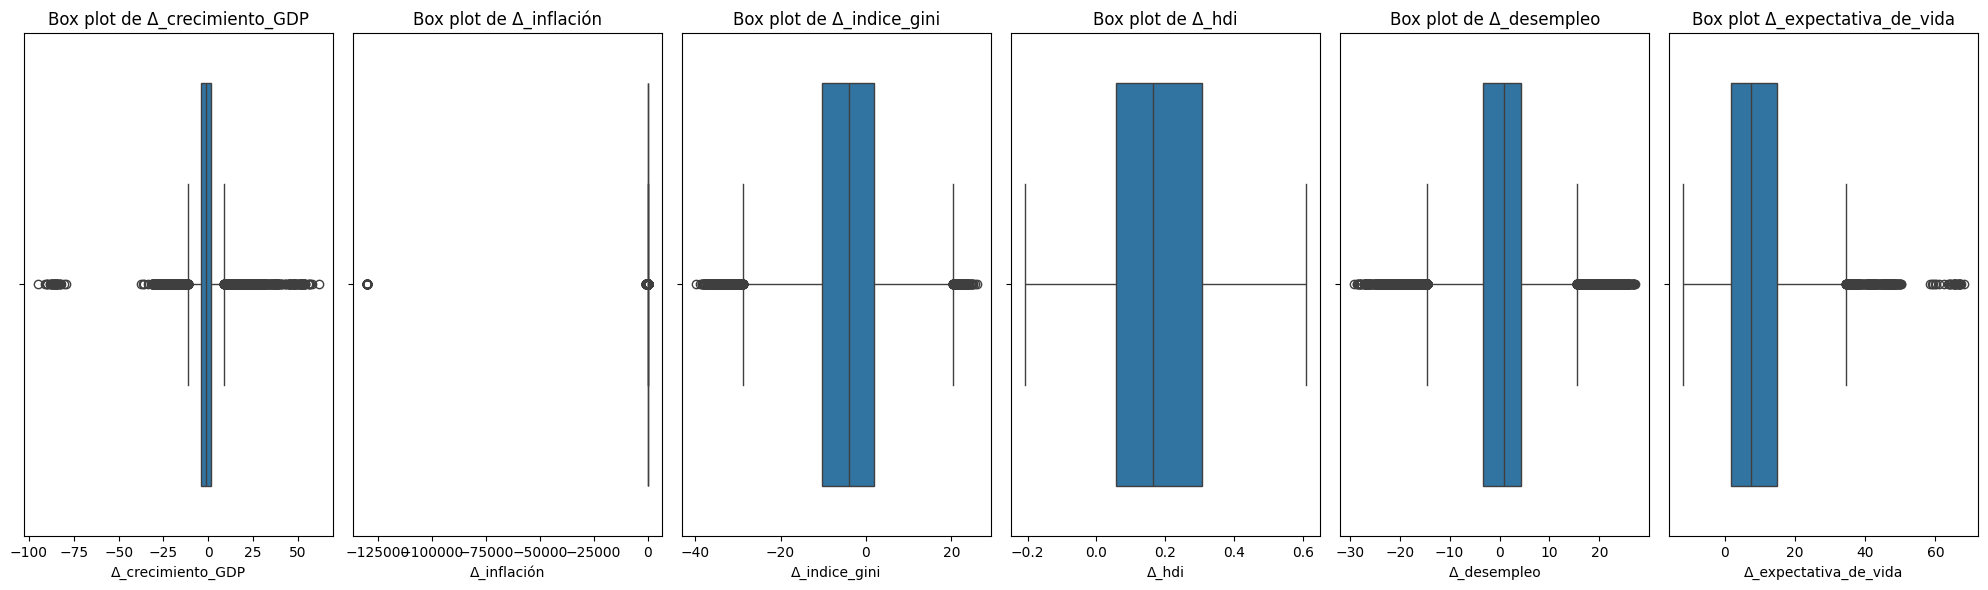

In [71]:
#Primero haremos analisis de la distirbucion de algunas variables numericas

#importamos las bibliotecas para graficar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#hacemos uso de subplots para ver los graficos lado a lado
ig, axes = plt.subplots(1, 6, figsize=(20, 6))  # (rows, columns)

#primero hacemos el boxplot del XXX
sns.boxplot(x='Δ_crecimiento_GDP', data=df_merged, ax=axes[0], )
axes[0].set_title("Box plot de Δ_crecimiento_GDP")

#luego procedemos a hacer el grafico para XXX
sns.boxplot(x='Δ_inflación', data=df_merged, ax=axes[1])
axes[1].set_title("Box plot de Δ_inflación")

#luego procedemos a hacer el grafico para XXX
sns.boxplot(x='Δ_indice_gini', data=df_merged, ax=axes[2])
axes[2].set_title("Box plot de Δ_indice_gini")

#luego procedemos a hacer el grafico para XXX
sns.boxplot(x='Δ_hdi', data=df_merged, ax=axes[3])
axes[3].set_title("Box plot de Δ_hdi")

#luego procedemos a hacer el grafico para XXX
sns.boxplot(x='Δ_desempleo', data=df_merged, ax=axes[4])
axes[4].set_title("Box plot de Δ_desempleo")

#luego procedemos a hacer el grafico para XXX
sns.boxplot(x='Δ_expectativa_de_vida', data=df_merged, ax=axes[5])
axes[5].set_title("Box plot Δ_expectativa_de_vida")

plt.tight_layout()
plt.show()

### **2.3.3 Histograma**

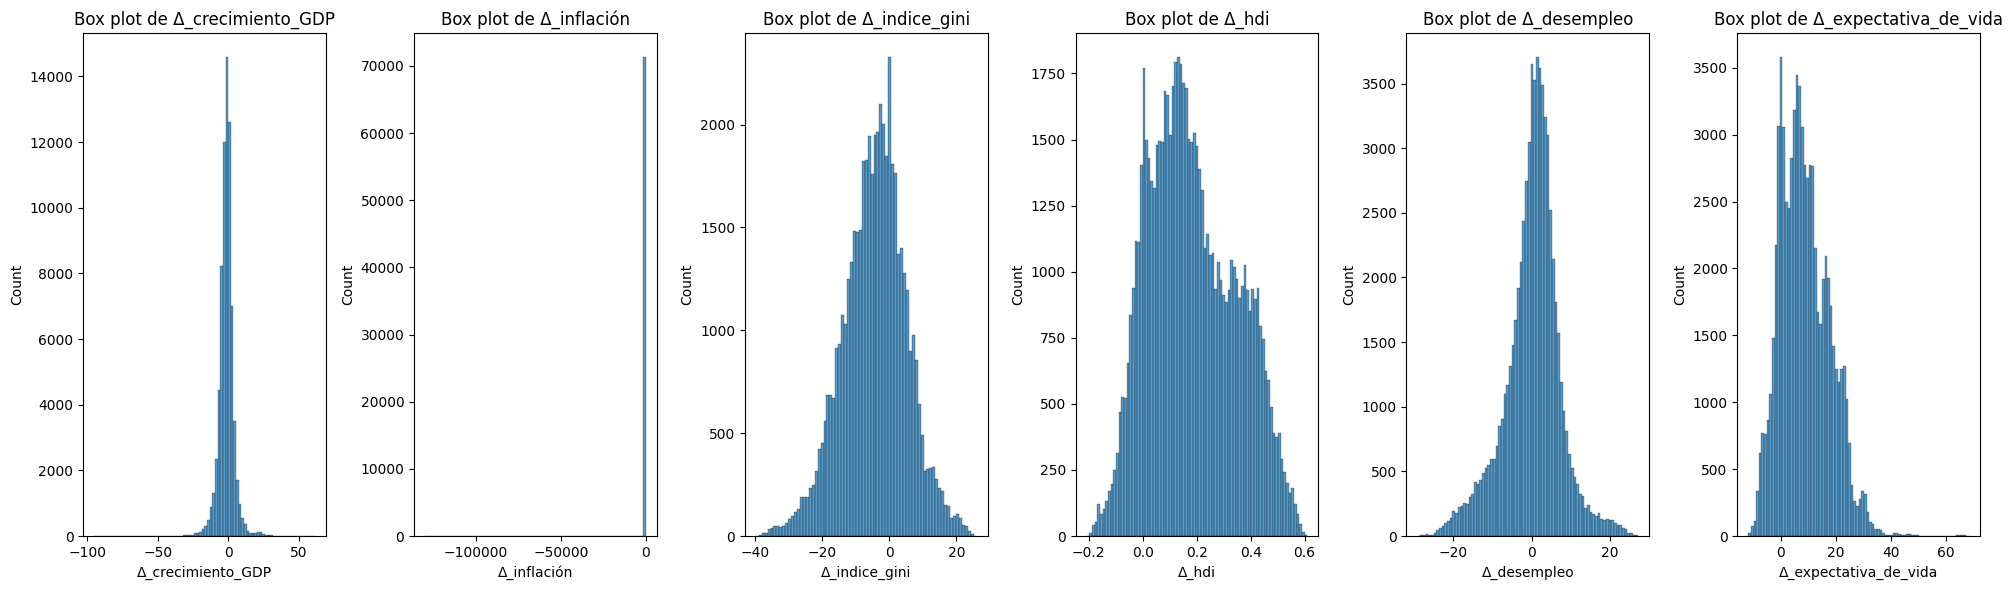

In [72]:
ig, axes = plt.subplots(1, 6, figsize=(20, 6))  # (rows, columns)

#histograma de XXX
sns.histplot(x='Δ_crecimiento_GDP', bins='rice' ,data=df_merged, ax=axes[0], )
axes[0].set_title("Box plot de Δ_crecimiento_GDP")

#histograma de XXX
sns.histplot(x='Δ_inflación', bins='rice' ,data=df_merged, ax=axes[1], )
axes[1].set_title("Box plot de Δ_inflación")

#histograma de XXX
sns.histplot(x='Δ_indice_gini', bins='rice' ,data=df_merged, ax=axes[2], )
axes[2].set_title("Box plot de Δ_indice_gini")

#histograma de XXX
sns.histplot(x='Δ_hdi', bins='rice' ,data=df_merged, ax=axes[3], )
axes[3].set_title("Box plot de Δ_hdi")

#histograma de XXX
sns.histplot(x='Δ_desempleo', bins='rice' ,data=df_merged, ax=axes[4], )
axes[4].set_title("Box plot de Δ_desempleo")

#histograma de XXX
sns.histplot(x='Δ_expectativa_de_vida', bins='rice' ,data=df_merged, ax=axes[5], )
axes[5].set_title("Box plot de Δ_expectativa_de_vida")

plt.tight_layout()
plt.show()

### **2.3.4. Analisis de outliers**

In [73]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np

# El primer paso consiste en calcular el rango intercuartil
GDP_Q1 = df_merged['Δ_crecimiento_GDP'].quantile(0.25)  #percentil 25 o cuartil 1
GDP_Q3 = df_merged['Δ_crecimiento_GDP'].quantile(0.75)  #percentil 75 o cuartil 2
GDP_IQR = GDP_Q3 - GDP_Q1  # rango intercuartil

#Definimos los limites inferiores y superiores. Cualquier observacion que salga sera considerado un outlier
GDP_lower_bound = GDP_Q1 - 1.5 * GDP_IQR
GDP_upper_bound = GDP_Q3 + 1.5 * GDP_IQR

#Creamos un nuevo df con solo la data de los valores outliers y los ordenamos por el valor descendente de charges
GDP_outliers_df = df_merged[(df_merged['Δ_crecimiento_GDP'] < GDP_lower_bound) | (df_merged['Δ_crecimiento_GDP'] > GDP_upper_bound)].sort_values(by='Δ_crecimiento_GDP',ascending=False)

In [74]:
# El primer paso consiste en calcular el rango intercuartil
inf_Q1 = df_merged['Δ_inflación'].quantile(0.25)  #percentil 25 o cuartil 1
inf_Q3 = df_merged['Δ_inflación'].quantile(0.75)  #percentil 75 o cuartil 2
inf_IQR = inf_Q3 - inf_Q1  # rango intercuartil

#Definimos los limites inferiores y superiores. Cualquier observacion que salga sera considerado un outlier
inf_lower_bound = inf_Q1 - 1.5 * inf_IQR
inf_upper_bound = inf_Q3 + 1.5 * inf_IQR

#Creamos un nuevo df con solo la data de los valores outliers y los ordenamos por el valor descendente de charges
inf_outliers_df = df_merged[(df_merged['Δ_inflación'] < inf_lower_bound) | (df_merged['Δ_inflación'] > inf_upper_bound)].sort_values(by='Δ_inflación',ascending=False)

#### **2.3.4.2. Histograma de outliers de GDP e Inflacion**

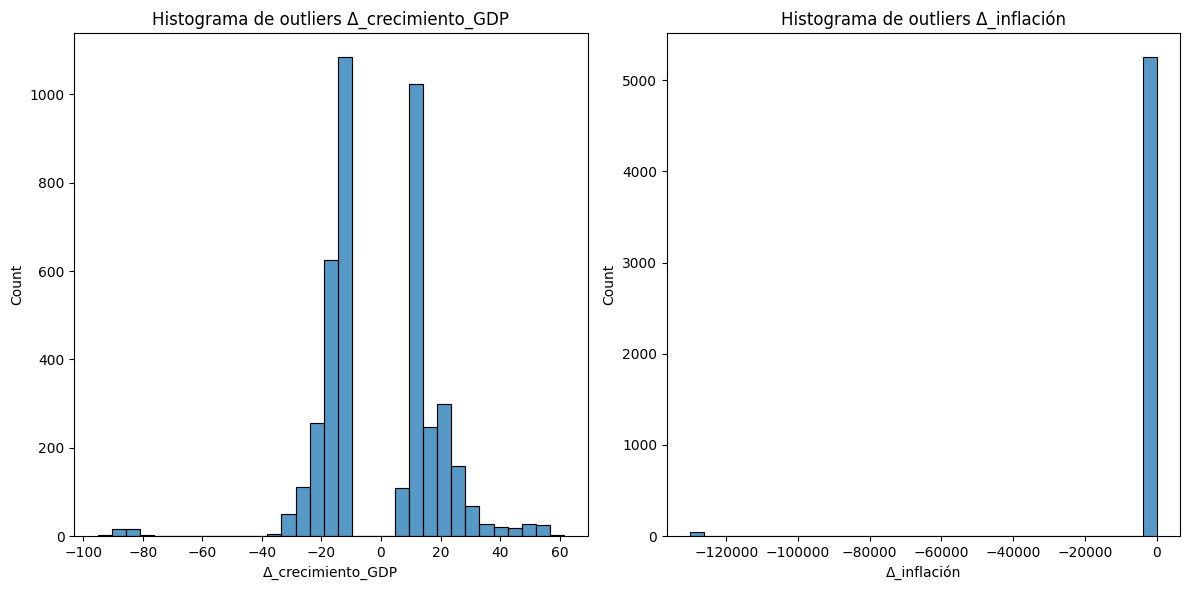

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # (rows, columns)

# Histograma de Δ_crecimiento_GDP
sns.histplot(x='Δ_crecimiento_GDP', bins='rice', data=GDP_outliers_df, ax=axes[0])
axes[0].set_title("Histograma de outliers Δ_crecimiento_GDP")

# Histograma de Δ_inflación
sns.histplot(x='Δ_inflación', bins='rice', data=inf_outliers_df, ax=axes[1])
axes[1].set_title("Histograma de outliers Δ_inflación")

plt.tight_layout()
plt.show()

In [76]:
#df_merged.to_csv('preprocessed_indicators.csv', index=False)

In [77]:
#from google.colab import files

#files.download('preprocessed_indicators.csv')

In [78]:
df_filtered = df_merged[~((df_merged['pais_origen'] == 'Venezuela') & (df_merged['año'] == 2019))]


In [79]:
inf_outliers_df = df_filtered[(df_filtered['Δ_inflación'] < inf_lower_bound) | (df_filtered['Δ_inflación'] > inf_upper_bound)].sort_values(by='Δ_inflación',ascending=False)

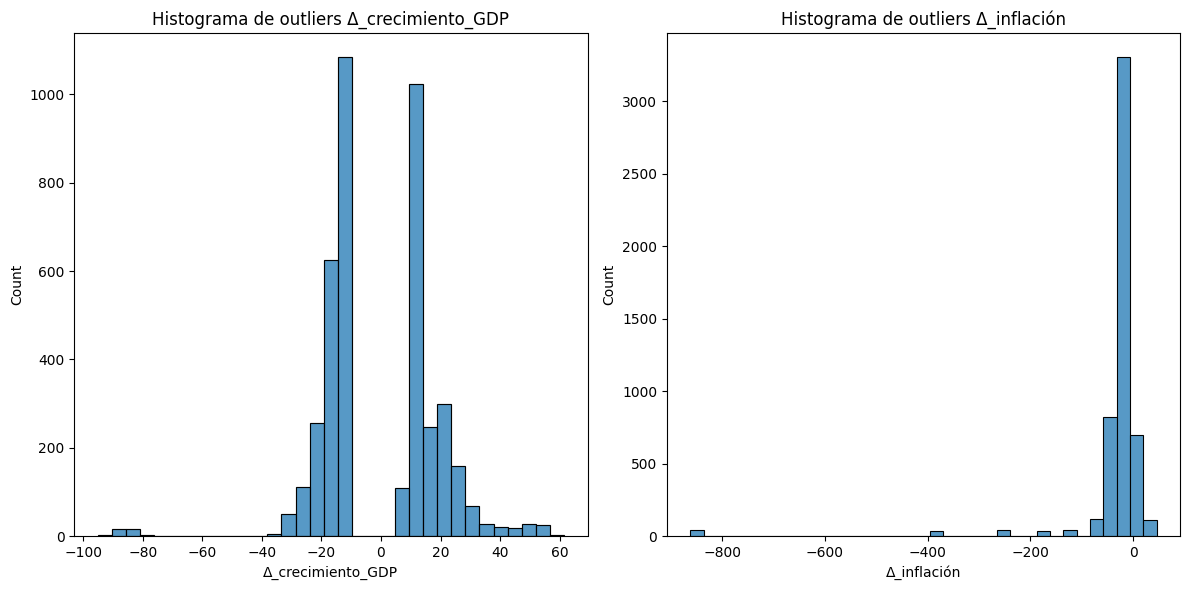

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # (rows, columns)

# Histograma de Δ_crecimiento_GDP
sns.histplot(x='Δ_crecimiento_GDP', bins='rice', data=GDP_outliers_df, ax=axes[0])
axes[0].set_title("Histograma de outliers Δ_crecimiento_GDP")

# Histograma de Δ_inflación
sns.histplot(x='Δ_inflación', bins='rice', data=inf_outliers_df, ax=axes[1])
axes[1].set_title("Histograma de outliers Δ_inflación")

plt.tight_layout()
plt.show()

In [81]:
idx_min = df_filtered['Δ_inflación'].idxmin()

In [82]:
df_filtered.iloc[idx_min]

,16205
ref_año,BEL2015MDA2015
pais_origen,Moldova
pais_destino,Belgium
año,2015
Δ_crecimiento_GDP,-3.234085
Δ_inflación,-4.748783
Δ_indice_gini,1.3
Δ_hdi,0.173
Δ_desempleo,4.667
Δ_expectativa_de_vida,11.046805


### Pasos extra homero